In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
from sklearn.metrics import accuracy_score  
from sklearn import svm
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn import metrics
import itertools
#import cvxopt
import typing
import warnings
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
CLEANR = re.compile('<.*?>') 
#Function to process the reviews to make it ready for bag of words
def text_pre_process(ser):
    ps = PorterStemmer() 
    #Only keep words and remove all puncutations and unwanted numerics from the text
    review = re.sub(CLEANR, '', ser)
    stop = list(stopwords.words('english'))+list(string.punctuation)+list(string.digits)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop]
    review = ' '.join(review)
    return review

processed_text=pd.read_csv('movie_review_train.csv')
processed_text.columns
processed_text['review']=processed_text['review'].apply(lambda x: text_pre_process(x))
processed_text.head()

,review,sentiment
0,one review mention watch oz episod hooked. rig...,positive
1,wonder littl production. film techniqu unassum...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there' famili littl boy (jake) think the...,negative
4,"petter mattei' ""love time money"" visual stun f...",positive


In [3]:
def extract_bag_of_words_train_test(train_file, test_file):
    import numpy as np
    import nltk
    # Read the CSV file and extract Bag of Words Features
    train_df=pd.read_csv(train_file)
    test_df=pd.read_csv(test_file)
    train_df['review']=train_df['review'].apply(lambda x: text_pre_process(x))
    test_df['review']=test_df['review'].apply(lambda x: text_pre_process(x))
    train_df['sentiment']=train_df['sentiment'].map({'negative': 0, 'positive': 1})
    test_df['sentiment']=test_df['sentiment'].map({'negative': 0, 'positive': 1})
    cv = CountVectorizer(max_features=1500)
    #cv = CountVectorizer()
    X_train = cv.fit_transform(train_df['review']).toarray()
    X_test =cv.transform(test_df['review']).toarray()
    y_train=train_df['sentiment']
    y_test=test_df['sentiment']
    return (X_train,y_train,X_test,y_test)

### Extracting Train and Test data from using bag of words

In [4]:
X_train,y_train,X_test,y_test= extract_bag_of_words_train_test("movie_review_train.csv", "movie_review_test.csv")

In [5]:
X_train.shape

(5000, 1500)

# Built in kernels with hyper-parameter tunning 

- ## Linear Kernel

In [6]:
X_train = scale(X_train)
X_test=scale(X_test)

In [7]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)


params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                       return_train_score=True)     
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................................C=0.1; total time=   9.7s
[CV] END ..............................................C=0.1; total time=   9.6s
[CV] END ..............................................C=0.1; total time=   9.9s
[CV] END ..............................................C=0.1; total time=   9.5s
[CV] END ..............................................C=0.1; total time=   9.7s
[CV] END ................................................C=1; total time=   7.6s
[CV] END ................................................C=1; total time=   7.7s
[CV] END ................................................C=1; total time=   7.6s
[CV] END ................................................C=1; total time=   7.7s
[CV] END ................................................C=1; total time=   7.7s
[CV] END ...............................................C=10; total time=  10.3s
[CV] END ........................................

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [8]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.441344,0.130326,2.214066,0.015221,0.1,{'C': 0.1},0.674,0.693,0.698,0.490,...,0.6454,0.078367,5,0.72175,0.73725,0.75925,0.56550,0.73550,0.70385,0.070211
1,5.859288,0.045033,1.805024,0.025213,1,{'C': 1},0.852,0.842,0.840,0.860,...,0.8450,0.010040,1,0.97425,0.97625,0.97350,0.97675,0.97300,0.97475,0.001492
2,7.291500,0.644137,1.780130,0.043691,10,{'C': 10},0.820,0.816,0.817,0.829,...,0.8152,0.011548,2,0.99950,0.99975,0.99925,0.99975,0.99975,0.99960,0.000200
3,6.946871,0.079776,1.725154,0.030554,100,{'C': 100},0.819,0.810,0.812,0.825,...,0.8114,0.011500,3,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.000000
4,6.972777,0.148019,1.773403,0.077327,1000,{'C': 1000},0.819,0.810,0.812,0.825,...,0.8114,0.011500,3,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.000000


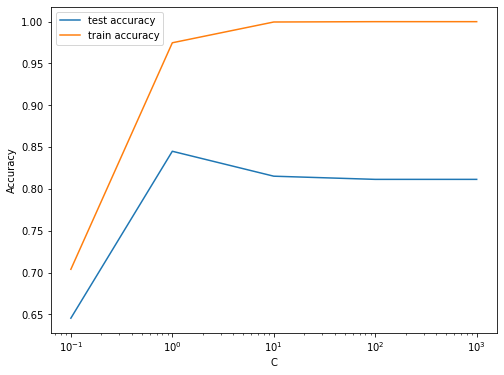

In [9]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [10]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.845 at C = 1


In [11]:
# model with the best value of C
model = SVC(C=best_score)

# fit
model.fit(X_train, y_train)

# predict
y_pred_linear = model.predict(X_test)

In [12]:
# metrics
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_linear))

# precision
print("precision", metrics.precision_score(y_test, y_pred_linear))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_linear))




accuracy 0.8546666666666667
precision 0.8620236530880421
recall 0.8530559167750326


In [38]:
metrics.accuracy_score(y_test, y_pred_linear)

0.8546666666666667

- ## RBF Kernel

In [13]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4,1e-5],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  




Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001, 1e-05]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [14]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.269560,0.127848,2.503301,0.046431,1,0.01,"{'C': 1, 'gamma': 0.01}",0.533,0.544,0.551,...,0.5306,0.034529,16,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.000000
1,6.865449,0.076392,2.111596,0.015595,1,0.001,"{'C': 1, 'gamma': 0.001}",0.838,0.827,0.830,...,0.8334,0.007060,3,0.98600,0.98650,0.98700,0.98600,0.98625,0.98635,0.000374
2,5.993543,0.076575,1.974620,0.048862,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.860,0.850,0.841,...,0.8488,0.012189,1,0.89775,0.90750,0.91075,0.91350,0.90850,0.90760,0.005340
3,7.580094,0.091822,2.387335,0.046344,1,0.00001,"{'C': 1, 'gamma': 1e-05}",0.561,0.611,0.788,...,0.6196,0.102103,12,0.58350,0.62025,0.81200,0.54750,0.69725,0.65210,0.094094
4,7.200774,0.100391,2.434955,0.031397,10,0.01,"{'C': 10, 'gamma': 0.01}",0.542,0.548,0.563,...,0.5416,0.035217,13,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.000000
5,7.115182,0.121959,2.048843,0.042262,10,0.001,"{'C': 10, 'gamma': 0.001}",0.819,0.807,0.810,...,0.8120,0.008556,6,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.000000
6,4.496355,0.358940,1.288781,0.031189,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.839,0.829,0.827,...,0.8310,0.011524,4,0.95975,0.96300,0.96250,0.96450,0.96325,0.96260,0.001570
7,5.792460,0.067415,1.894643,0.046783,10,0.00001,"{'C': 10, 'gamma': 1e-05}",0.858,0.850,0.843,...,0.8484,0.011706,2,0.89850,0.90750,0.90925,0.90925,0.90900,0.90670,0.004152
8,7.363427,0.177688,2.477947,0.053014,100,0.01,"{'C': 100, 'gamma': 0.01}",0.542,0.548,0.563,...,0.5416,0.035217,13,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.000000
9,7.109718,0.060264,2.037590,0.034179,100,0.001,"{'C': 100, 'gamma': 0.001}",0.812,0.813,0.814,...,0.8120,0.008649,6,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.000000


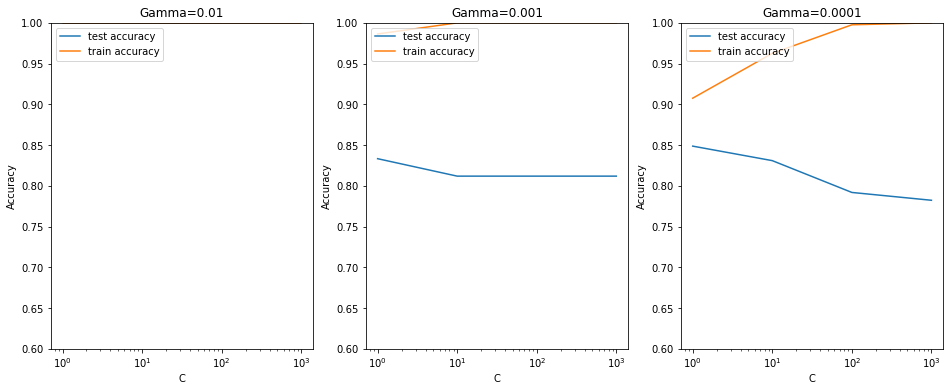

In [15]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [16]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))


The best test score is 0.8488 corresponding to hyperparameters {'C': 1, 'gamma': 0.0001}


## Custom Kernel

In [17]:
X_train.shape

(5000, 1500)

In [18]:
def my_kernel(X, Y,p=3):
    return (1 + np.dot(X,Y.T)) ** p


# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

[[454 277]
 [ 75 694]] 

accuracy 0.7653333333333333
precision 0.7147270854788877
sensitivity/recall 0.9024707412223667


### ADA-BOOST WITH DECISION TREE

In [19]:
dt = DecisionTreeClassifier(random_state=42)

In [20]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

### Hyper-parameter Tunning of the Decision Tree

In [21]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=2, scoring = "accuracy")

In [22]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 873 ms, sys: 247 ms, total: 1.12 s
Wall time: 18.5 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=2)

In [23]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.503999,0.022911,0.016123,0.001731,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.6568,0.6456,0.6600,0.652,0.6536,0.005426,43
1,0.452997,0.060619,0.010082,0.003222,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.6568,0.6456,0.6600,0.652,0.6536,0.005426,43
2,0.313888,0.040514,0.006299,0.002687,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.6568,0.6456,0.6600,0.652,0.6536,0.005426,43
3,0.343310,0.020767,0.009007,0.005097,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.6568,0.6456,0.6600,0.652,0.6536,0.005426,43
4,0.306931,0.027290,0.007013,0.004090,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.6568,0.6432,0.6632,0.652,0.6538,0.007297,41


In [24]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
48,0.760439,0.021715,0.005357,0.002809,entropy,20,50,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.7040,0.6968,0.7048,0.7200,0.7064,0.008447,1
44,0.710848,0.048977,0.004226,0.001291,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.7080,0.6912,0.7048,0.7200,0.7060,0.010253,2
49,0.524093,0.033714,0.003496,0.001487,entropy,20,100,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.7080,0.6832,0.6968,0.7288,0.7042,0.016699,3
41,0.797883,0.008329,0.005019,0.003857,entropy,10,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.6928,0.7040,0.7080,0.7112,0.7040,0.006951,4
23,0.809194,0.041380,0.007082,0.005015,gini,20,50,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7016,0.6976,0.7048,0.7112,0.7038,0.004976,5


In [25]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=50,
                       random_state=42)

In [26]:
dt_best = grid_search.best_estimator_

In [27]:
print("Train Accuracy :", accuracy_score(y_train, dt_best.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, dt_best.predict(X_train)))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, dt_best.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, dt_best.predict(X_test)))

Train Accuracy : 0.75
Train Confusion Matrix:
[[1825  707]
 [ 543 1925]]
--------------------------------------------------
Test Accuracy : 0.7133333333333334
Test Confusion Matrix:
[[488 243]
 [187 582]]


In [28]:
shallow_tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=50,
                       random_state=42)

In [29]:
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.7133333333333334

In [30]:
### Hyper-parameter tunning 

In [46]:
# adaboost with the tree as base estimator

estimators = list(range(100, 600, 100))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = n_est, random_state=101)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)
    best_nest=n_est
print(best_nest)

500


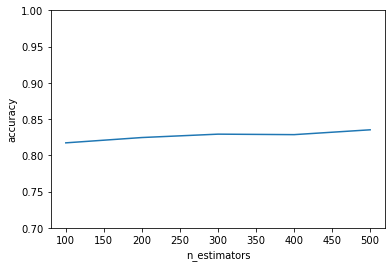

In [47]:
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.70, 1])
plt.show()

In [48]:
max(abc_scores)

0.8353333333333334

### Misclassification Analysis

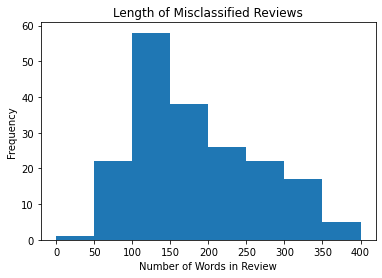

In [36]:
df_test=pd.read_csv("movie_review_test.csv")
missclf_reviews = df_test.iloc[np.where(np.not_equal(y_test, y_pred_linear))[0]]['review'].to_frame()
missclf_reviews['length'] = missclf_reviews['review'].apply(lambda x : len(x.split()))
plt.hist(missclf_reviews['length'],bins=np.linspace(0,400,9))
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.title('Length of Misclassified Reviews')
plt.savefig('svm_misclass_length.png')